In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests  

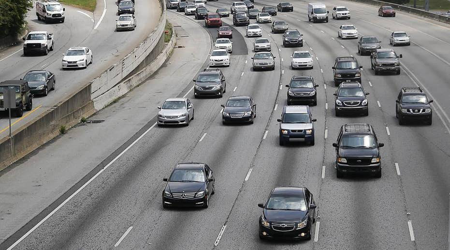

In [2]:
image=Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image=image.resize((450,250))
image_arr=np.array(image)
image

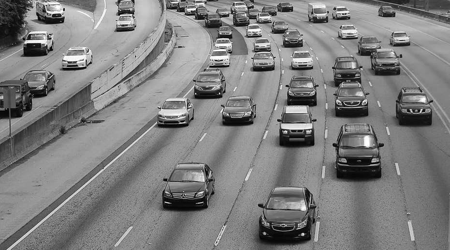

In [3]:
grey=cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

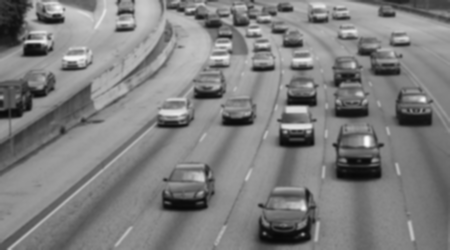

In [4]:
blur=cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

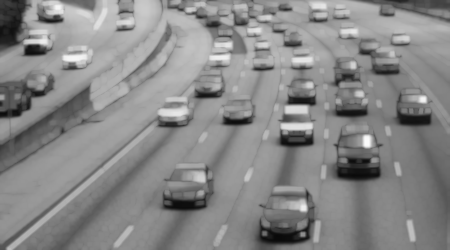

In [5]:
dilated=cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

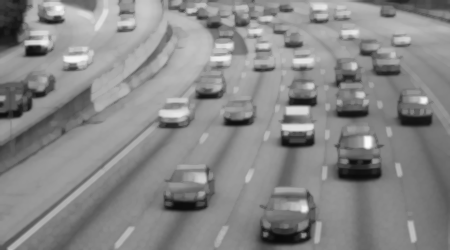

In [6]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [10]:
car_cascade_src = 'C:/Users/Jay/120 DATA SCIENCE PROJECTS/Vehicle Detection & Counting/Required Files/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

21  cars found


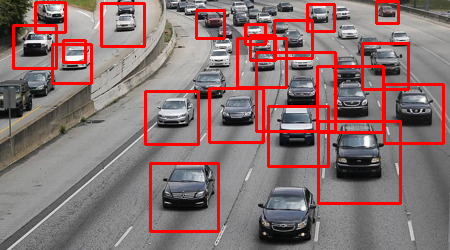

In [12]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [13]:
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

In [18]:
bus_cascade_src = 'C:/Users/Jay/120 DATA SCIENCE PROJECTS/Vehicle Detection & Counting/Required Files/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  bus's found


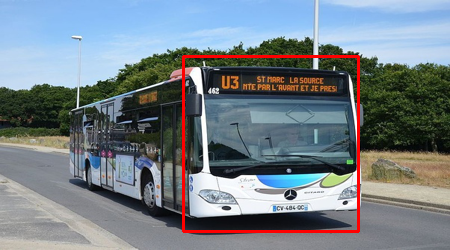

In [19]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

In [20]:
cascade_src = 'C:/Users/Jay/120 DATA SCIENCE PROJECTS/Vehicle Detection & Counting/Required Files/cars.xml'
video_src = 'C:/Users/Jay/120 DATA SCIENCE PROJECTS/Vehicle Detection & Counting/Required Files/Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))  

In [22]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img) 
video.release()